# EDA (Exploratory Data Analysis) -1

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv

In [2]:
# load the dataset
datafile=pd.read_csv('Database\data_clean.csv')
datafile

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=datafile.copy()

In [4]:
# shape of data
data1.shape

(158, 10)

In [5]:
# Data types
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

## Data type conversions

In [6]:
# Finding non-null counts
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
# Removing 1st column as it is not useful
data2=data1.iloc[:,1:]
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [8]:
# data conversions (from object datatype to definite datatype)

# coerce will introduce NA values for non-numeric data in the columns
data2['Temp C']=pd.to_numeric(data2['Temp C'],errors='coerce')
data2['Month']=pd.to_numeric(data2['Month'],errors='coerce')

# astype will convert an object datatype to selected definitive datatype
data2['Weather']=data2['Weather'].astype('category')
# data2['Wind']=data2['Wind'].astype('integer') (for egs: conversion to integer)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


## Removing Duplicate entries

In [10]:
# Count of duplicated rows
data2[data2.duplicated()].shape

(1, 9)

In [11]:
# Print the duplicated rows
data2[data2.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [12]:
# Dropping the duplicate data
data3=data2.drop_duplicates()

In [13]:
data3.shape

(157, 9)

## Dropping the Column

In [14]:
# Dropping the Temp C column as it repeates with column Temp
data4=data3.drop('Temp C',axis=1)
data4

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Renaming the Column

In [15]:
# Renaming the column Solar.R to Solar
data5=data4.rename({'Solar.R':'Solar'},axis=1)
data5

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Outlier Detection

In [16]:
# Outliar detection of numerical varable using Histogram, Box plot and descriptive statistics

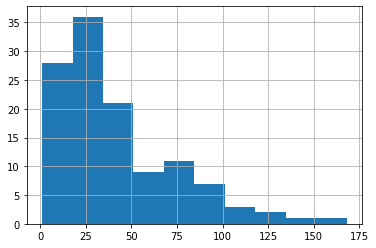

In [17]:
data5['Ozone'].hist()

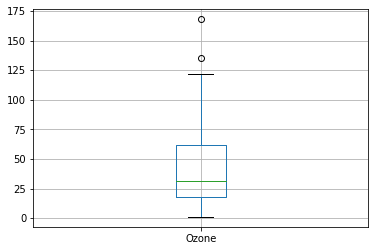

In [18]:
data5.boxplot(['Ozone'])

In [19]:
data5['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [20]:
# Outlier Detection of Categorical variable using Bar chart

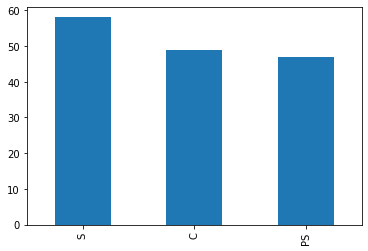

In [21]:
data5['Weather'].value_counts().plot(kind='bar')

## Missing Values and Imputation

In [22]:
# Identify missing values; observations (rows) having atleast one NA value
data5[data5.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C
24,NaN,66.0,16.6,5.0,25,2010,57,PS
25,NaN,266.0,14.9,5.0,26,2010,58,C
26,NaN,NaN,8.0,5.0,27,2010,57,PS
31,NaN,286.0,8.6,6.0,1,2010,78,S
32,NaN,287.0,9.7,6.0,2,2010,74,C


In [23]:
data5[data5.isnull().any(axis=1)].shape

(46, 8)

In [24]:
# Visualizing the missing values

In [25]:
colors = ['#f740ee','#30fcef']   # optional step: specify the colours - Turquoise is missing. Magenta is not missing.

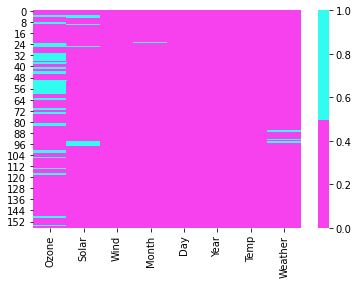

In [26]:
sns.heatmap(data5.isnull(),cmap=sns.color_palette(colors))

In [27]:
data5.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [28]:
# Missing value imputation for numerical variables

In [29]:
# Mean Imputation
mean=data5['Ozone'].mean()
mean

41.81512605042017

In [30]:
data5['Ozone']=data5['Ozone'].fillna(mean)
data5

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [31]:
# Missing value imputation for categorical variables

In [32]:
col=data5[['Weather']]
col

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [33]:
col.isnull().sum()

Weather    3
dtype: int64

In [34]:
# Mode imputation
mode=col.mode()
mode

,Weather
0,S


In [35]:
col=col.fillna(mode)
col

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [36]:
# Joining the dataset with imputed dataset

In [37]:
data5.shape

(157, 8)

In [38]:
col.shape

(157, 1)

In [39]:
data6=pd.concat([data5.iloc[:,0:7],col],axis=1)
data6

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [40]:
data6.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [41]:
cleaned_data=data6
cleaned_data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


In [42]:
# To save a .csv copy of cleaned data 
cleaned_data.to_csv('cleaned_data.csv')

## Scatter plot and Correlation analysis

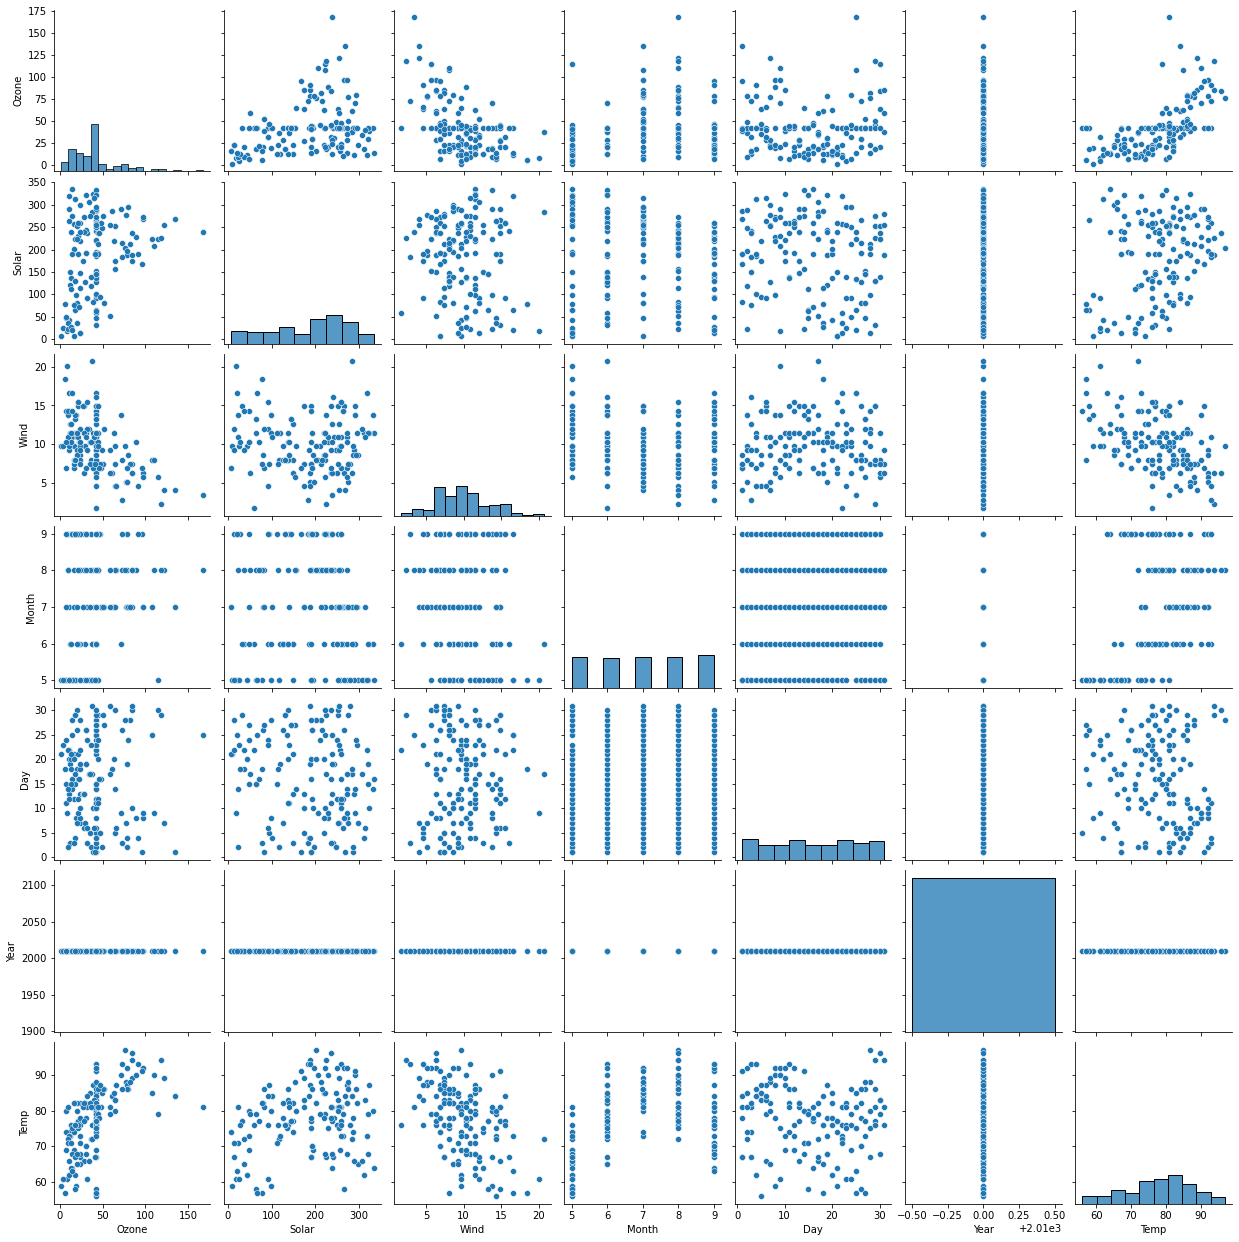

In [43]:
# Create the default pairplot (displays only numerical variables)
sns.pairplot(data6)

In [44]:
# Find the Correlation
data6.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


## Transformations

In [45]:
# Dummy Variable (Transforming Categorical data to Numerical)

In [46]:
data6=pd.get_dummies(data6,columns=['Weather'])
data6

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,2010,62,0,0,1
4,41.815126,NaN,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.0,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.0,13.2,9.0,27,2010,77,0,0,1


In [47]:
data7=data6.dropna()
data7

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,2010,62,0,0,1
6,23.000000,299.0,8.6,5.0,7,2010,65,0,1,0
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.0,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.0,13.2,9.0,27,2010,77,0,0,1


In [48]:
# Feature Scaling

In [49]:
# 1. Standardization of data (0 mean, 1 stdev)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
data7.values

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [67]:
array = data7.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)
rescaledX

array([[-2.96e-02,  4.52e-02, -7.34e-01, ..., -6.58e-01, -6.68e-01,
         1.29e+00],
       [-2.04e-01, -7.67e-01, -5.62e-01, ...,  1.52e+00, -6.68e-01,
        -7.76e-01],
       [-1.04e+00, -4.17e-01,  7.57e-01, ..., -6.58e-01,  1.50e+00,
        -7.76e-01],
       ...,
       [-4.13e-01,  7.90e-02, -8.78e-01, ..., -6.58e-01,  1.50e+00,
        -7.76e-01],
       [-1.15e-03, -4.62e-01,  9.29e-01, ..., -6.58e-01, -6.68e-01,
         1.29e+00],
       [-8.32e-01, -6.20e-01, -5.62e-01, ...,  1.52e+00, -6.68e-01,
        -7.76e-01]])

In [68]:
# summarize transformed standardized data
np.set_printoptions(precision=2)
print(rescaledX)

[[-2.96e-02  4.52e-02 -7.34e-01 ... -6.58e-01 -6.68e-01  1.29e+00]
 [-2.04e-01 -7.67e-01 -5.62e-01 ...  1.52e+00 -6.68e-01 -7.76e-01]
 [-1.04e+00 -4.17e-01  7.57e-01 ... -6.58e-01  1.50e+00 -7.76e-01]
 ...
 [-4.13e-01  7.90e-02 -8.78e-01 ... -6.58e-01  1.50e+00 -7.76e-01]
 [-1.15e-03 -4.62e-01  9.29e-01 ... -6.58e-01 -6.68e-01  1.29e+00]
 [-8.32e-01 -6.20e-01 -5.62e-01 ...  1.52e+00 -6.68e-01 -7.76e-01]]


In [69]:
# print only top 5 observations
print(rescaledX[0:5,:])

[[-0.03  0.05 -0.73 -1.46 -1.71  0.   -1.22 -0.66 -0.67  1.29]
 [-0.2  -0.77 -0.56 -1.46 -1.6   0.   -0.67  1.52 -0.67 -0.78]
 [-1.04 -0.42  0.76 -1.46 -1.48  0.   -0.45 -0.66  1.5  -0.78]
 [-0.83  1.43  0.44 -1.46 -1.37  0.   -1.77 -0.66 -0.67  1.29]
 [-0.66  1.27 -0.39 -1.46 -1.03  0.   -1.44 -0.66  1.5  -0.78]]


In [60]:
# 2. Normalization of data (Range: 0 to 1)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
data7.values

array([[ 41.  , 190.  ,   7.4 , ...,   0.  ,   0.  ,   1.  ],
       [ 36.  , 118.  ,   8.  , ...,   1.  ,   0.  ,   0.  ],
       [ 12.  , 149.  ,  12.6 , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [ 30.  , 193.  ,   6.9 , ...,   0.  ,   1.  ,   0.  ],
       [ 41.82, 145.  ,  13.2 , ...,   0.  ,   0.  ,   1.  ],
       [ 18.  , 131.  ,   8.  , ...,   1.  ,   0.  ,   0.  ]])

In [71]:
array=data7.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)
rescaledX

array([[0.24, 0.56, 0.3 , ..., 0.  , 0.  , 1.  ],
       [0.21, 0.34, 0.33, ..., 1.  , 0.  , 0.  ],
       [0.07, 0.43, 0.57, ..., 0.  , 1.  , 0.  ],
       ...,
       [0.17, 0.57, 0.27, ..., 0.  , 1.  , 0.  ],
       [0.24, 0.42, 0.61, ..., 0.  , 0.  , 1.  ],
       [0.1 , 0.38, 0.33, ..., 1.  , 0.  , 0.  ]])

In [72]:
# summarize transformed Normalized data
np.set_printoptions(precision=2)
print(rescaledX)

[[0.24 0.56 0.3  ... 0.   0.   1.  ]
 [0.21 0.34 0.33 ... 1.   0.   0.  ]
 [0.07 0.43 0.57 ... 0.   1.   0.  ]
 ...
 [0.17 0.57 0.27 ... 0.   1.   0.  ]
 [0.24 0.42 0.61 ... 0.   0.   1.  ]
 [0.1  0.38 0.33 ... 1.   0.   0.  ]]


In [73]:
# print only top 5 observations
print(rescaledX[0:5,:])

[[0.24 0.56 0.3  0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.33 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.57 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.52 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.36 0.   0.2  0.   0.2  0.   1.   0.  ]]


## Automatic EDA Method

In [74]:
# Using Pandas Profiling
# import pandas_profiling as pp

In [76]:
EDA_report=pp.ProfileReport(datafile)
EDA_report.to_file(output_file='PP Report.html')

In [77]:
# Using Sweetviz
# import sweetviz as sv

In [78]:
sweet_report=sv.analyze(datafile)
sweet_report.show_html('SV Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SV Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
